In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from matplotlib import pyplot as plt

import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [123]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'plane', 'car', 'bird'}

background_classes = {'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

# print(type(foreground_classes))

In [0]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(5000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      background_data.append(img)
      background_label.append(labels[j])
    else:
      img = images[j].tolist()
      foreground_data.append(img)
      foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [0]:
def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img#.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

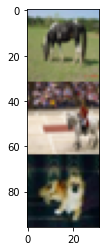

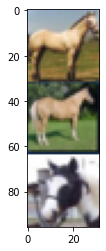

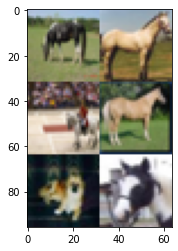

torch.Size([3, 96, 32])


In [127]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())


In [0]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
    if i != fg:
      image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
      j+=1
    else: 
      image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
      label = foreground_label[fg_idx] 
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [129]:
# background_label[34].item()
a = [1,2,3,3,4]
x = set()
x = set(a)
print(x, type(x))
x.add(6)
print(x,a)

{1, 2, 3, 4} <class 'set'>
{1, 2, 3, 4, 6} [1, 2, 3, 3, 4]


In [130]:
y = np.random.randint(0,35000,8)
print(y)
s=set(background_label[y].tolist())
s

[20781 26573  5446 24981 14973  7869 27407 24254]


{3, 5, 6, 7, 8}

In [131]:
a = np.random.randint(0,15000)
s.add(foreground_label[a].item())
s

{2, 3, 5, 6, 7, 8}

In [0]:
desired_num = 30000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
list_set_labels = [] 
for i in range(desired_num):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  mosaic_list_of_images.append(image_list)
  mosaic_label.append(label)
  list_set_labels.append(set_idx)


In [133]:
list_set_labels

[{2, 3, 4, 5, 7, 9},
 {1, 3, 4, 6, 7, 9},
 {0, 3, 4, 5, 6, 8, 9},
 {0, 3, 4, 5, 6, 7, 8},
 {2, 5, 6, 7, 8, 9},
 {2, 3, 5, 7, 9},
 {1, 4, 5, 7, 8, 9},
 {0, 4, 5, 6, 7, 9},
 {2, 3, 4, 6, 7},
 {1, 3, 4, 5, 7, 9},
 {0, 3, 4, 5, 6, 8, 9},
 {2, 3, 4, 6, 7, 8, 9},
 {2, 4, 5, 7, 8, 9},
 {1, 3, 4, 5, 8, 9},
 {1, 3, 4, 5, 8},
 {1, 3, 5, 6, 7, 9},
 {2, 3, 5, 6, 7, 9},
 {2, 3, 4, 6, 8, 9},
 {1, 3, 4, 5, 7, 9},
 {0, 3, 4, 5, 6, 7, 9},
 {0, 3, 4, 5, 6, 7, 8, 9},
 {2, 4, 6, 8, 9},
 {1, 3, 4, 5, 9},
 {0, 3, 4, 5, 6, 8},
 {0, 3, 4, 7, 8, 9},
 {2, 4, 5, 6, 7, 9},
 {1, 3, 5, 6, 8, 9},
 {0, 4, 5, 6, 7, 8, 9},
 {0, 3, 4, 6, 8},
 {1, 3, 5, 6, 7, 9},
 {1, 3, 5, 7, 9},
 {1, 3, 4, 6, 7, 8},
 {0, 3, 4, 5, 6, 8},
 {0, 4, 6, 8, 9},
 {1, 3, 5, 7, 8},
 {2, 3, 5, 6, 7, 8},
 {0, 3, 6, 7, 8, 9},
 {1, 3, 5, 6, 7, 9},
 {0, 3, 5, 6, 8, 9},
 {1, 4, 5, 6, 9},
 {1, 3, 4, 5, 6, 7},
 {2, 3, 6, 8, 9},
 {0, 5, 6},
 {2, 3, 4, 5, 7, 8, 9},
 {2, 4, 5, 7},
 {2, 4, 5, 6, 7, 9},
 {1, 4, 6, 7, 8, 9},
 {0, 3, 4, 8, 9},
 {2, 3, 4, 8, 9}

7


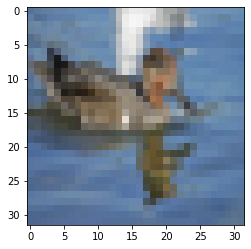

bird


In [134]:
qw=45

print(fore_idx[qw])
imshow(mosaic_list_of_images[qw][fore_idx[qw]])
# print(mosaic_list_of_images[0])
print(classes[mosaic_label[qw]]) 

# imshow(mosaic_list_of_images[13][2])
# print(type(mosaic_list_of_images[1][0]))
# print(mosaic_label)

In [0]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list_of_images, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [0]:
# class Module1(nn.Module):
#   def __init__(self):
#     super(Module1, self).__init__()
#     self.conv1 = nn.Conv2d(3, 6, 5)
#     self.pool = nn.MaxPool2d(2, 2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16 * 5 * 5, 120)
#     self.fc2 = nn.Linear(120, 84)
#     self.fc3 = nn.Linear(84, 10)
#     self.fc4 = nn.Linear(10,1)

#   def forward(self, z):
#     x = torch.zeros([batch,9],dtype=torch.float64)
#     y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
#     x,y = x.to("cuda"),y.to("cuda")
#     for i in range(9):
#       x[:,i] = self.helper(z[:,i])[:,0]
#     x = F.softmax(x,dim=1)   # alphas
    
#     x1 = x[:,0]
#     torch.mul(x1[:,None,None,None],z[:,0])

#     for i in range(9):            
#       x1 = x[:,i]          
#       y = y + torch.mul(x1[:,None,None,None],z[:,i])
#     return y , x 
  
#   def helper(self,x):
#     x = self.pool(F.relu(self.conv1(x)))
#     x = self.pool(F.relu(self.conv2(x)))
#     # x = x.contiguous()
#     # print("x before", x.shape)
#     x = x.view(-1, 16 * 5 * 5)
#     # print("x after", x.shape)
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = F.relu(self.fc3(x))
#     x = self.fc4(x)
#     return x

class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [0]:
# class Module2(nn.Module):
#   def __init__(self):
#     super(Module2, self).__init__()
    
#     self.conv1 = nn.Conv2d(3, 6, 5)
#     self.pool = nn.MaxPool2d(2, 2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16 * 5 * 5, 120)
#     self.fc2 = nn.Linear(120, 84)
#     self.fc3 = nn.Linear(84, 10)
#     self.fc4 = nn.Linear(10,3)

#   def forward(self,y):  #z batch of list of 9 images
#     y1 = self.pool(F.relu(self.conv1(y)))
#     y1 = self.pool(F.relu(self.conv2(y1)))
#     # print(y1.shape)
#     y1 = y1.reshape(-1, 16 * 5 * 5)

#     y1 = F.relu(self.fc1(y1))
#     y1 = F.relu(self.fc2(y1))
#     y1 = F.relu(self.fc3(y1))
#     y1 = self.fc4(y1)
#     return y1

class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.module1 = Module1().double()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,3)

  def forward(self,z):  #z batch of list of 9 images
    y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
    x = torch.zeros([batch,9],dtype=torch.float64)
    x = x.to("cuda")
    y = y.to("cuda")
    for i in range(9):
        x[:,i] = self.module1.forward(z[:,i])[:,0]

    x = F.softmax(x,dim=1)

    x1 = x[:,0]
    torch.mul(x1[:,None,None,None],z[:,0])

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None,None,None],z[:,i])
      y = y.contiguous()


    y1 = self.pool(F.relu(self.conv1(y)))
    y1 = self.pool(F.relu(self.conv2(y1)))
    y1 = y1.contiguous()
    y1 = y1.reshape(-1, 16 * 5 * 5)

    y1 = F.relu(self.fc1(y1))
    y1 = F.relu(self.fc2(y1))
    y1 = F.relu(self.fc3(y1))
    y1 = self.fc4(y1)
    return y1 , x, y

In [0]:
# where_net = Module1().double()
# where_net = where_net.to("cuda")

In [0]:
# what_net = Module2().double()
# what_net = what_net.to("cuda")

In [0]:
fore_net = Module2().double()
fore_net = fore_net.to("cuda")

In [142]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer_where = optim.SGD(where_net.parameters(), lr=0.01, momentum=0.9)
# optimizer_what = optim.SGD(what_net.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)
nos_epochs = 150

for epoch in range(nos_epochs):  # loop over the dataset multiple times

  running_loss = 0.0
  cnt=0

  iteration = desired_num // batch
  
  #training data set
  
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    inputs, labels, fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    # zero the parameter gradients
    
    # optimizer_what.zero_grad()
    # optimizer_where.zero_grad()
    optimizer.zero_grad()
    
    # avg_images , alphas = where_net(inputs)
    # avg_images = avg_images.contiguous()
    # outputs = what_net(avg_images)

    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    # optimizer_what.step()
    # optimizer_where.step()
    optimizer.step()
    running_loss += loss.item()
    mini = 40
    if cnt % mini == mini - 1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      running_loss = 0.0
    cnt=cnt+1

print('Finished Training')
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")

[1,    40] loss: 1.099
[1,    80] loss: 1.099
[1,   120] loss: 1.099
[2,    40] loss: 1.099
[2,    80] loss: 1.099
[2,   120] loss: 1.099
[3,    40] loss: 1.099
[3,    80] loss: 1.099
[3,   120] loss: 1.098
[4,    40] loss: 1.099
[4,    80] loss: 1.099
[4,   120] loss: 1.099
[5,    40] loss: 1.099
[5,    80] loss: 1.099
[5,   120] loss: 1.099
[6,    40] loss: 1.099
[6,    80] loss: 1.099
[6,   120] loss: 1.099
[7,    40] loss: 1.098
[7,    80] loss: 1.099
[7,   120] loss: 1.099
[8,    40] loss: 1.099
[8,    80] loss: 1.098
[8,   120] loss: 1.099
[9,    40] loss: 1.098
[9,    80] loss: 1.098
[9,   120] loss: 1.098
[10,    40] loss: 1.098
[10,    80] loss: 1.098
[10,   120] loss: 1.098
[11,    40] loss: 1.098
[11,    80] loss: 1.098
[11,   120] loss: 1.098
[12,    40] loss: 1.098
[12,    80] loss: 1.098
[12,   120] loss: 1.098
[13,    40] loss: 1.097
[13,    80] loss: 1.097
[13,   120] loss: 1.097
[14,    40] loss: 1.097
[14,    80] loss: 1.096
[14,   120] loss: 1.095
[15,    40] loss: 1

In [0]:
torch.save(fore_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/fore_net_epoch"+str(nos_epochs)+".pt")
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")

In [0]:
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx_test =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
test_set_labels = []
for i in range(10000):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx_test.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  test_images.append(image_list)
  test_label.append(label)
  test_set_labels.append(set_idx)


In [0]:
test_data = MosaicDataset(test_images,test_label,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [153]:
torch.argmax(alphas[5]), alphas[5]

(tensor(4, device='cuda:0'),
 tensor([0.0229, 0.0977, 0.0541, 0.0020, 0.3294, 0.0999, 0.0399, 0.0530, 0.3010],
        device='cuda:0', dtype=torch.float64, grad_fn=<SelectBackward>))

In [224]:
from tabulate import tabulate
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

train_set = DataLoader( msd,batch_size= batch ,shuffle=False)
with torch.no_grad():
  for data in train_set:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      count += 1
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 train images: %d %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)
print(count)

print("="*100)
table = []
entry = [1,'Full',30000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)
table.append(entry)



print(tabulate(table, headers=['S.No.', 'configuration','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 30000 train images: 99 %
total correct 29944
total train set images 30000
focus_true_pred_true 23519 =============> FTPT : 78 %
focus_false_pred_true 6425 =============> FFPT : 21 %
focus_true_pred_false 17 =============> FTPF : 0 %
focus_false_pred_false 39 =============> FFPF : 0 %
argmax_more_than_half 23184
argmax_less_than_half 6816
30000
  S.No.  configuration      data_points     FTPT     FFPT       FTPF    FFPF    avg_img > 0.5
-------  ---------------  -------------  -------  -------  ---------  ------  ---------------
      1  Full                     30000  78.3967  21.4167  0.0566667    0.13            23184


In [225]:
entry_no = 2
train_set = DataLoader( msd,batch_size= batch ,shuffle=False)
fg = [0,1,2]
bg = [3,4,5,6,7,8,9]

# cnt=0
for a in fg :
  for i in range(5):
    b1 = bg[i]
    for j in range(i+1 , 6): 
      b2 = bg[j]
      for k in range(j+1 , 7):
        b3 = bg[k]
        # cnt+=1
        # print( cnt , a,b1,b2,b3)
        count = 0
        correct = 0
        total = 0
        focus_true_pred_true = 0
        focus_false_pred_true = 0
        focus_true_pred_false = 0
        focus_false_pred_false = 0
        argmax_more_than_half = 0
        argmax_less_than_half = 0
        with torch.no_grad():
          for data in train_set:
            inputs, labels , fore_idx = data
            inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
            outputs, alphas, avg_images = fore_net(inputs)

            _, predicted = torch.max(outputs.data, 1)

            for m in range(labels.size(0)):
              # count
              if(count == 30000):
                break
              s = list_set_labels[count]
              # print(count, s, str(a)+str(b1)+str(b2)+str(b3))
              if (a in s and b1 in s and b2 in s and b3 in s):
                # print(str(a)+str(b1)+str(b2)+str(b3))
                total += 1
                focus = torch.argmax(alphas[m])
                if alphas[m][focus] >= 0.5 :
                  argmax_more_than_half += 1
                else:
                  argmax_less_than_half += 1

                if(focus == fore_idx[m] and predicted[m] == labels[m]):
                    focus_true_pred_true += 1
                elif(focus != fore_idx[m] and predicted[m] == labels[m]):
                  focus_false_pred_true += 1
                elif(focus == fore_idx[m] and predicted[m] != labels[m]):
                  focus_true_pred_false += 1
                elif(focus != fore_idx[m] and predicted[m] != labels[m]):
                  focus_false_pred_false += 1
              
              count += 1
            
          correct += (predicted == labels).sum().item()  
          entry = [entry_no,'fg = ' + str(a) + ', Bg = ' + str(b1) + ' , ' + str(b2) + ' , ' + str(b3),total]
          if total == 0:
            entry.append(0)
            entry.append(0)
            entry.append(0)
            entry.append(0)
          else:
            entry.append((100 * focus_true_pred_true / total))
            entry.append( (100 * focus_false_pred_true / total))
            entry.append( ( 100 * focus_true_pred_false / total))
            entry.append( ( 100 * focus_false_pred_false / total))
          entry.append( argmax_more_than_half)
          table.append(entry)
          entry_no += 1

print(tabulate(table, headers=['S.No.', 'configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'] ) )


  S.No.  configuration             data_points    FTPT %     FFPT %     FTPF %     FFPF %     avg_img > 0.5
-------  ----------------------  -------------  ---------  ---------  ---------  ---------  ---------------
      1  Full                            30000    78.3967   21.4167   0.0566667  0.13                 23184
      2  fg = 0, Bg = 3 , 4 , 5           3188    91.1857    8.75157  0.0313676  0.0313676             3005
      3  fg = 0, Bg = 3 , 4 , 6           3168    90.3409    9.53283  0.0315657  0.094697              2986
      4  fg = 0, Bg = 3 , 4 , 7           3117    90.5037    9.40006  0          0.0962464             2933
      5  fg = 0, Bg = 3 , 4 , 8           3194    89.856    10.0501   0          0.0939261             2990
      6  fg = 0, Bg = 3 , 4 , 9           3243    90.1943    9.71323  0.0308356  0.0616713             3046
      7  fg = 0, Bg = 3 , 5 , 6           3217    90.7678    9.10786  0.0621697  0.0621697             3037
      8  fg = 0, Bg = 3 , 5 

In [0]:
col = ['configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5']
# df_train = pd.DataFrame()
import csv
with open("/content/drive/My Drive/Research/drill_deep_cifar/train.csv", "w", newline ='') as f:
  thewriter = csv.writer(f)
  row = len(table)
  thewriter.writerow(['S.No.','configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'])
  for i in range(row):
    thewriter.writerow(table[i])

In [227]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 train images: %d %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)

print("="*100)
table = []
entry = [1,'Full',10000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)
table.append(entry)

print(tabulate(table, headers=['S.No.', 'configuration','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 10000 train images: 87 %
total correct 8763
total train set images 10000
focus_true_pred_true 7232 =============> FTPT : 72 %
focus_false_pred_true 1531 =============> FFPT : 15 %
focus_true_pred_false 328 =============> FTPF : 3 %
focus_false_pred_false 909 =============> FFPF : 9 %
argmax_more_than_half 7453
argmax_less_than_half 2547
  S.No.  configuration      data_points    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  ---------------  -------------  ------  ------  ------  ------  ---------------
      1  Full                     10000   72.32   15.31    3.28    9.09             7453


In [198]:
entry_no = 2
#usinfg test_loader
fg = [0,1,2]
bg = [3,4,5,6,7,8,9]

# cnt=0
for a in fg :
  for i in range(5):
    b1 = bg[i]
    for j in range(i+1 , 6): 
      b2 = bg[j]
      for k in range(j+1 , 7):
        b3 = bg[k]
        # cnt+=1
        # print( cnt , a,b1,b2,b3)
        count = 0
        correct = 0
        total = 0
        focus_true_pred_true = 0
        focus_false_pred_true = 0
        focus_true_pred_false = 0
        focus_false_pred_false = 0
        argmax_more_than_half = 0
        argmax_less_than_half = 0
        with torch.no_grad():
          for data in test_loader:
            inputs, labels , fore_idx = data
            inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
            outputs, alphas, avg_images = fore_net(inputs)

            _, predicted = torch.max(outputs.data, 1)

            for m in range(labels.size(0)):
              # count
              if(count == 10000):
                break
              s = test_set_labels[count]
              # print(count, s, str(a)+str(b1)+str(b2)+str(b3))
              if (a in s and b1 in s and b2 in s and b3 in s):
                # print(str(a)+str(b1)+str(b2)+str(b3))
                total += 1
                focus = torch.argmax(alphas[m])
                if alphas[m][focus] >= 0.5 :
                  argmax_more_than_half += 1
                else:
                  argmax_less_than_half += 1

                if(focus == fore_idx[m] and predicted[m] == labels[m]):
                    focus_true_pred_true += 1
                elif(focus != fore_idx[m] and predicted[m] == labels[m]):
                  focus_false_pred_true += 1
                elif(focus == fore_idx[m] and predicted[m] != labels[m]):
                  focus_true_pred_false += 1
                elif(focus != fore_idx[m] and predicted[m] != labels[m]):
                  focus_false_pred_false += 1
              
              count += 1
            
          correct += (predicted == labels).sum().item()  
          entry = [entry_no,'fg = ' + str(a) + ', Bg = ' + str(b1) + ' , ' + str(b2) + ' , ' + str(b3),total]
          if total == 0:
            entry.append(0)
            entry.append(0)
            entry.append(0)
            entry.append(0)
          else:
            entry.append((100 * focus_true_pred_true / total))
            entry.append( (100 * focus_false_pred_true / total))
            entry.append( ( 100 * focus_true_pred_false / total))
            entry.append( ( 100 * focus_false_pred_false / total))
          entry.append( argmax_more_than_half)
          table.append(entry)
          entry_no += 1

print(tabulate(table, headers=['S.No.', 'configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'] ) )


  S.No.  configuration             data_points    FTPT %     FFPT %     FTPF %     FFPF %     avg_img > 0.5
-------  ----------------------  -------------  ---------  ---------  ---------  ---------  ---------------
      1  Full                            10000    72.32    15.31        3.28       9.09                7453
      2  fg = 0, Bg = 3 , 4 , 5           1049    85.224    3.43184     3.24118    8.10296              921
      3  fg = 0, Bg = 3 , 4 , 6           1030    82.9126   3.68932     3.98058    9.41748              892
      4  fg = 0, Bg = 3 , 4 , 7           1054    83.871    3.41556     3.03605    9.67742              914
      5  fg = 0, Bg = 3 , 4 , 8           1031    83.5112   3.68574     3.39476    9.40834              902
      6  fg = 0, Bg = 3 , 4 , 9           1022    83.7573   4.20744     3.13112    8.90411              884
      7  fg = 0, Bg = 3 , 5 , 6           1054    84.5351   2.94118     4.0797     8.44402              930
      8  fg = 0, Bg = 3 , 5 

In [0]:
col = ['configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5']

In [0]:
df_test = pd.DataFrame()

In [0]:
import csv
with open("/content/drive/My Drive/Research/drill_deep_cifar/test.csv", "w", newline ='') as f:
  thewriter = csv.writer(f)
  row = len(table)
  thewriter.writerow(['S.No.','configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'])
  for i in range(row):
    thewriter.writerow(table[i])

In [223]:
test = pd.read_csv("test.csv")
test.head()

,S.No.,configuration,data_points,FTPT %,FFPT %,FTPF %,FFPF %,avg_img > 0.5
0,1,Full,10000,72.320000,15.310000,3.280000,9.090000,7453
1,2,"fg = 0, Bg = 3 , 4 , 5",1049,85.224023,3.431840,3.241182,8.102955,921
2,3,"fg = 0, Bg = 3 , 4 , 6",1030,82.912621,3.689320,3.980583,9.417476,892
3,4,"fg = 0, Bg = 3 , 4 , 7",1054,83.870968,3.415560,3.036053,9.677419,914
4,5,"fg = 0, Bg = 3 , 4 , 8",1031,83.511154,3.685742,3.394762,9.408341,902
